In [146]:
import numpy as np
import csv

In [50]:
import matplotlib.pyplot as plt

In [51]:
%matplotlib inline

In [248]:
class LinearClassifier:
    def __init__(self, lrate=1.0):
        self.w = 0
        self.b = 0
        self.lrate = lrate
    
    def threshold(self, x):
        if x >= 0:
            return 1
        return 0
    
    def predict(self,X):
        return np.apply_along_axis(self.threshold,0,np.dot(np.mat(self.w), X.T) + self.b)
        
    def loss(self, X, y):
        return np.sum(np.abs(self.predict(X) - y))/len(X) + np.dot(self.w, self.w.T) + self.b**2
    
    def fit(self,X,y):
        n_train = len(X)
        self.w = np.zeros(len(X[0]))
        self.b = 0
        time = 1
        finish = False
        idx = 0
        accuracy = []
        accuracy.append(1 - np.sum(np.abs(self.predict(X) - y))/len(X))
        loss_prev = self.loss(X,y)
        while not finish:
            rate = 10.0 * self.lrate/ 10**(time//100 + 1)
            condition = y[idx] - self.threshold(np.dot(self.w,X[idx]) + self.b)
            self.w = self.w + rate*condition*X[idx]
            self.b = self.b + rate*condition   
            time += 1
            idx = (idx + 1) % n_train
            if condition != 0:
                accuracy.append(1 - np.sum(np.abs(self.predict(X) - y))/len(X))
            
            if condition != 0 and time > 1000:
                finish = abs(loss_prev - self.loss(X,y)) < 1e-3*self.loss(X,y)
                loss_prev = self.loss(X,y)
            
            if time > 10000:
                break
            
            #if len(accuracy) > 10:
            #    finish = np.sum(np.abs(np.array(accuracy[-10:]) - np.array(accuracy[-11:-1]))) < 1e-3
        plt.plot(accuracy)
    
    """def fit(self, X, y):
        X_ext = np.ones((len(X), len(X[0]) + 1))
        X_ext[:,:-1] = X
        learning_rate = 0.1
        self.w = np.zeros(len(X[0]) + 1)
        converged = False
        accuracy = []
        time = 1
        while not converged:
            print time
            for idx in range(len(X)):
                learning_rate = 1.0/ 10**(time//100 + 1)
                if y[idx] - self.threshold(np.dot(self.w,X_ext[idx])) != 0:
                    self.w = np.add(self.w, (y[idx] - self.threshold(np.dot(self.w,X_ext[idx]))) * learning_rate * X_ext[idx])
                    time += 1
                    accuracy.append(1 - np.sum(np.abs(np.apply_along_axis(self.threshold,0,np.dot(np.mat(self.w), X_ext.T)) - y))/len(X))
            
            if len(accuracy) > 10:
                converged = np.sum(np.abs(np.array(accuracy[-10:]) - np.array(accuracy[-11:-1]))) < 1e-3
            #general bound on number of iterations
            if time > 5000:
                break
                
        #print accuracy
        plt.plot(accuracy)"""

In [321]:
class LogisticRegression:
    def __init__(self, rate=1.0):
        self.w = 0
        self.b = 0
        self.lrate = rate
    
    def h(self, x):
        return 1.0/(1 + np.exp(-np.dot(self.w, x) - self.b))
    
    def threshold(self, x):
        if x >= 0:
            return 1
        return 0
    
    def loss(self, X, y):
        return np.sum(np.abs(self.predict(X) - y))/len(X) + np.dot(self.w, self.w.T) + self.b**2
    
    def predict(self,X):
        return np.apply_along_axis(self.threshold,0,np.dot(np.mat(self.w), X.T) + self.b)
    
    def fit(self, X, y, n_iter=10000):
        n_train = len(X)
        self.w = np.zeros(len(X[0]))
        self.b = 0
        finish = False
        accuracy = []
        time = 1
        idx = 0
        loss_prev = self.loss(X,y)
        accuracy.append(1 - np.sum(np.abs(self.predict(X) - y))/len(X))
        while not finish:
            rate = 2 * self.lrate/ 2**(time//100 + 1)
            self.w = self.w + rate*(y[idx] - self.h(X[idx]))*self.h(X[idx])*(1 - self.h(X[idx]))*X[idx]
            self.b = self.b + rate*(y[idx] - self.h(X[idx]))*self.h(X[idx])*(1 - self.h(X[idx]))  
            time += 1
            #idx = (idx + 1) % n_train
            idx = random.randint(0, n_train-1)
            accuracy.append(1 - np.sum(np.abs(self.predict(X) - y))/len(X))
            
            if time > n_iter:
                break
            
                
        #print accuracy
        plt.plot(accuracy)

In [144]:
def read_datafile(name):
    #Technical function to read data from files.
    with open(name, 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        num = len(list(reader))
    with open(name, 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        data = np.zeros((num,124))
        idx = 0
        for row in reader:
            data[idx,0] = int(row[0])
            data[idx, [int(x.split(":")[0]) for x in row[1:-1]]] = 1
            idx += 1
    return data

In [163]:
data = read_datafile('adult_dataset/a7a.train')

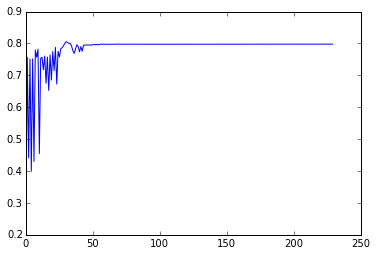

In [306]:
c = LinearClassifier()
c.fit(data[:,1:], (data[:,0] + 1)/2)

In [307]:
import random

In [317]:
random.randint(0,1)

1

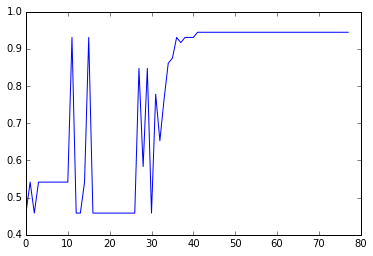

In [287]:
c = LinearClassifier()
c.fit(a[:,:2], a[:,2])

In [336]:
len(a) - sum(abs(c.predict(a[:,:2]) - a[:,2]))

68.0

In [245]:
len(data[:,1:][0])

123

In [240]:
len(c.w)

1

In [328]:
a = np.loadtxt('earthquake-noisy.data.txt', delimiter=',')

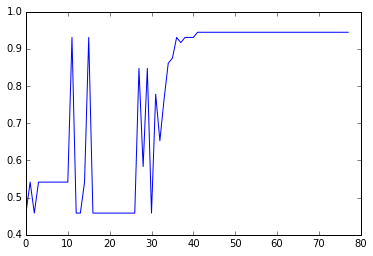

In [329]:
c = LinearClassifier()
c.fit(a[:,:2], a[:,2])

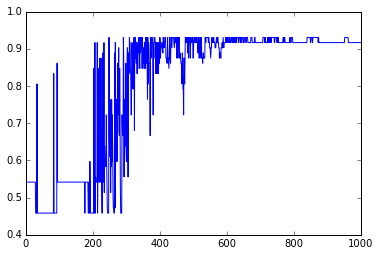

In [324]:
lr = LogisticRegression()
lr.fit(a[:,:2], a[:,2], 1000)

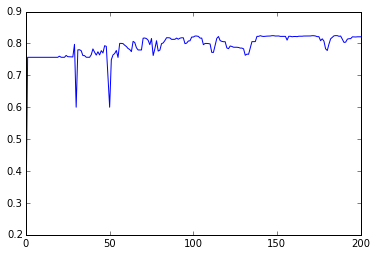

In [322]:
lr = LogisticRegression()
lr.fit(data[:,1:], (data[:,0] + 1)/2, 200)

In [26]:
a[:,2]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [163]:
c.w

array([-1.242,  1.527])

In [24]:
def f(x):
    if x >= 0:
        return 1
    return 0

In [156]:
a[2,2] - f(np.dot(c.w, a[2,:2]))

0.0

In [31]:
np.append(a[:,:2], np.ones(64), axis=0)

ValueError: all the input arrays must have same number of dimensions

In [29]:
np.ones(64)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [36]:
t = np.ones((64,3))

In [38]:
t[:,:-1] = a[:,:2]

In [39]:
t

array([[ 6.1,  4.9,  1. ],
       [ 5.2,  3.4,  1. ],
       [ 6.1,  4.4,  1. ],
       [ 6.1,  4.6,  1. ],
       [ 6.4,  5.8,  1. ],
       [ 6.1,  4.6,  1. ],
       [ 5.8,  4.3,  1. ],
       [ 5.9,  4.3,  1. ],
       [ 5.9,  4.7,  1. ],
       [ 6.2,  4.6,  1. ],
       [ 5.9,  4.7,  1. ],
       [ 5.8,  4.6,  1. ],
       [ 6.1,  4.6,  1. ],
       [ 5.9,  4.4,  1. ],
       [ 5.9,  5. ,  1. ],
       [ 6. ,  4.4,  1. ],
       [ 6. ,  4.2,  1. ],
       [ 5.9,  4.3,  1. ],
       [ 6.2,  4.7,  1. ],
       [ 6. ,  4.3,  1. ],
       [ 6.2,  4.4,  1. ],
       [ 6.1,  4.2,  1. ],
       [ 5.9,  3.8,  1. ],
       [ 5.8,  3.4,  1. ],
       [ 6. ,  4.8,  1. ],
       [ 6.1,  4.5,  1. ],
       [ 6.1,  4.5,  1. ],
       [ 5.6,  3.8,  1. ],
       [ 6.1,  4.5,  1. ],
       [ 5.3,  4.4,  1. ],
       [ 6.2,  6.6,  1. ],
       [ 6.1,  6.2,  1. ],
       [ 5. ,  5.9,  1. ],
       [ 5.5,  5.7,  1. ],
       [ 4.5,  4.8,  1. ],
       [ 5.4,  4.7,  1. ],
       [ 5.5,  5.6,  1. ],
 

In [55]:
a[:,:2]

array([[ 6.1,  4.9],
       [ 5.2,  3.4],
       [ 6.1,  4.4],
       [ 6.1,  4.6],
       [ 6.4,  5.8],
       [ 6.1,  4.6],
       [ 5.8,  4.3],
       [ 5.9,  4.3],
       [ 5.9,  4.7],
       [ 6.2,  4.6],
       [ 5.9,  4.7],
       [ 5.8,  4.6],
       [ 6.1,  4.6],
       [ 5.9,  4.4],
       [ 5.9,  5. ],
       [ 6. ,  4.4],
       [ 6. ,  4.2],
       [ 5.9,  4.3],
       [ 6.2,  4.7],
       [ 6. ,  4.3],
       [ 6.2,  4.4],
       [ 6.1,  4.2],
       [ 5.9,  3.8],
       [ 5.8,  3.4],
       [ 6. ,  4.8],
       [ 6.1,  4.5],
       [ 6.1,  4.5],
       [ 5.6,  3.8],
       [ 6.1,  4.5],
       [ 5.3,  4.4],
       [ 6.2,  6.6],
       [ 6.1,  6.2],
       [ 5. ,  5.9],
       [ 5.5,  5.7],
       [ 4.5,  4.8],
       [ 5.4,  4.7],
       [ 5.5,  5.6],
       [ 4.8,  4.1],
       [ 6.1,  6. ],
       [ 5.6,  5.1],
       [ 6.3,  6.6],
       [ 5.9,  6.1],
       [ 6.1,  6.6],
       [ 5.7,  5.9],
       [ 5.6,  5. ],
       [ 6.1,  6.9],
       [ 5.8,  5.6],
       [ 5.9,

In [57]:
w = np.array([1,2])

In [66]:
np.apply_along_axis(f,0,np.dot(np.mat(w), a[:,:2].T))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [71]:
t1 = [1,3,4,6,18,10]

In [72]:
np.array(t1[-3:]) - np.array(t1[-4:-1])

array([ 2, 12, -8])

In [99]:
0//10

0

In [121]:
np.exp(-4)


0.018315638888734179

In [326]:
len(a)*0.8

57.6